# Lending Club Case Study

**Objective**: Lending club wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

###### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

###### Read the data

In [2]:
data = pd.read_csv('loan.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleanup

### Starting with dropping columns with too many null values

Fetching columns which have >60% of null values

In [3]:
cols_to_delete = [i[0] for i in data.isnull().mean().sort_values().items() if i[1] > 0.6]

In [4]:
print(f'The following {len(cols_to_delete)} columns have >60% of null values\nDeleting columns {cols_to_delete}')

The following 57 columns have >60% of null values
Deleting columns ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'num_bc_sats', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'mort_acc', 'num_bc_tl', 'num_tl_op_past_12m', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'mo_sin_rcnt_tl', 'num_il_tl', 'mo_sin_rcnt_rev_tl_op', 'verification_status_joint', 'mo_sin_old_il_acct', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'total_bc_limit', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_

In [5]:
data = data.drop(columns=cols_to_delete, axis=1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0




###### Examining the number of null values for remaining columns

In [6]:
for i in data.isnull().sum().sort_values().items():
    print(i)

('id', 0)
('inq_last_6mths', 0)
('open_acc', 0)
('pub_rec', 0)
('revol_bal', 0)
('total_acc', 0)
('initial_list_status', 0)
('out_prncp', 0)
('out_prncp_inv', 0)
('total_pymnt', 0)
('delinq_2yrs', 0)
('total_pymnt_inv', 0)
('total_rec_int', 0)
('total_rec_late_fee', 0)
('recoveries', 0)
('collection_recovery_fee', 0)
('last_pymnt_amnt', 0)
('policy_code', 0)
('application_type', 0)
('acc_now_delinq', 0)
('delinq_amnt', 0)
('total_rec_prncp', 0)
('dti', 0)
('earliest_cr_line', 0)
('zip_code', 0)
('int_rate', 0)
('installment', 0)
('grade', 0)
('sub_grade', 0)
('addr_state', 0)
('funded_amnt_inv', 0)
('home_ownership', 0)
('annual_inc', 0)
('verification_status', 0)
('loan_status', 0)
('funded_amnt', 0)
('pymnt_plan', 0)
('url', 0)
('loan_amnt', 0)
('purpose', 0)
('member_id', 0)
('issue_d', 0)
('term', 0)
('last_credit_pull_d', 2)
('title', 11)
('tax_liens', 39)
('revol_util', 50)
('collections_12_mths_ex_med', 56)
('chargeoff_within_12_mths', 56)
('last_pymnt_d', 71)
('pub_rec_bankrupt

\
\
**'desc' column:** Drop the description column since it is not a meaningful variable for analysis.

In [7]:
data = data.drop(columns=['desc'], axis=1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


\
\
**'emp_title'**: - Dropping the records with null emp_title since the values are very diverse and the highest common value 'US Army' matches only 134 records, followed by 'Bank of America' which matched 109 records. Imputing 2459 records with a common value will skew the analysis.

In [8]:
data = data[~data['emp_title'].isna()]

\
\
**'emp_length' column**: Since 'emp_length' cannot be imputed appropriately, dropping the records.

In [9]:
data = data[~data['emp_length'].isna()]


\
\
**'pub_rec_bankruptcies' column**: Dropping records without 'pub_rec_bankruptcies' because it is closely tied with loan defaulting. Imputing might not giv accurate  results

In [10]:
data = data[~data['pub_rec_bankruptcies'].isna()]
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


\
\
**'last_pymnt_d' Column**: Since last_pymnt_d does not have anything to do with loan defaulting and this data cannot be imputed appropriately, dropping null records

In [11]:
data = data[~data['last_pymnt_d'].isna()]
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


\
\
Since **'revol_util', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'title'** having null values are too few in number, dropping the records

In [12]:
data = data[~data['revol_util'].isna()]
data = data[~data['collections_12_mths_ex_med'].isna()]
data = data[~data['chargeoff_within_12_mths'].isna()]
data = data[~data['title'].isna()]
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0





###### Dropping columns which have unique values OR a single value

In [13]:
num_records = len(data)
irrelevant_columns_for_analysis = [i for i, j in data.nunique().items() if j == num_records or j == 1]
print(f'Dropping Columns - {irrelevant_columns_for_analysis}')
data = data.drop(columns=irrelevant_columns_for_analysis, axis=1)
data.shape

Dropping Columns - ['id', 'member_id', 'pymnt_plan', 'url', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


(36431, 41)

###### Finally verifying all null values

In [14]:
data.isna().sum().sum()

0

## Data sanity


##### Cleaning up data so that they are of the right data type for analysis


In [15]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36431.000000,36431.000000,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,...,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,11032.933491,10601.876895,326.187642,6.930694e+04,13.444293,0.146139,0.864840,9.351679,0.053663,...,52.216180,12311.226392,11841.691116,9912.631803,2304.442520,1.299912,92.852238,11.677622,2743.075381,0.041366
std,7433.904309,7166.520054,7072.645601,207.390058,6.354376e+04,6.643417,0.492211,1.063383,4.373724,0.234897,...,378.454016,9048.552965,8911.170172,7053.310578,2629.598904,7.065817,682.064837,140.884174,4473.621163,0.200100
min,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,5500.000000,5000.000000,168.900000,4.200000e+04,8.360000,0.000000,0.000000,6.000000,0.000000,...,0.000000,5672.634184,5413.880000,4800.000000,678.030000,0.000000,0.000000,0.000000,226.310000,0.000000
50%,10000.000000,10000.000000,9203.371902,283.280000,6.000000e+04,13.540000,0.000000,1.000000,9.000000,0.000000,...,0.000000,10101.589360,9632.410000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,15000.000000,14508.774540,432.220000,8.300000e+04,18.690000,0.000000,1.000000,12.000000,0.000000,...,0.000000,16700.865405,16094.780000,14000.000000,2891.865000,0.000000,0.000000,0.000000,3457.620000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [16]:
data.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp           

**'term' column**: Fixing 'term', removing preceding space and trailing text ' months' and converting to integer

In [17]:
data['term'] = data['term'].apply(lambda x: int(x[1:3]))

**'int_rate' column**: Fixing 'int_rate'. Removing the % and converting to float

In [18]:
data['int_rate'] = data['int_rate'].apply(lambda x: float(x[:-1]))

**'emp_length' column**: Fixing 'emp_length'. Removing the text. Converting <1 to 0 and 10+ to 15 so that numeric analysis can be done.

In [19]:
def fix_emp_length(x):
    if x == '< 1 year':
        return 0
    elif x == '10+ years':
        return 15
    elif x == '1 year':
        return 1;
    else:
        return int(x.replace(' years', ''))
        
data['emp_length'] = data['emp_length'].apply(lambda x: fix_emp_length(x))

**'revol_util' column**: Fixing 'revol_util'. Removing the % and converting to float.

In [20]:
data['revol_util'] = data['revol_util'].apply(lambda x: float(x[:-1]))

###### Checking of duplication of data

In [21]:
data.duplicated().sum()

0

# Outlier Treatment

**'annual_inc' column**

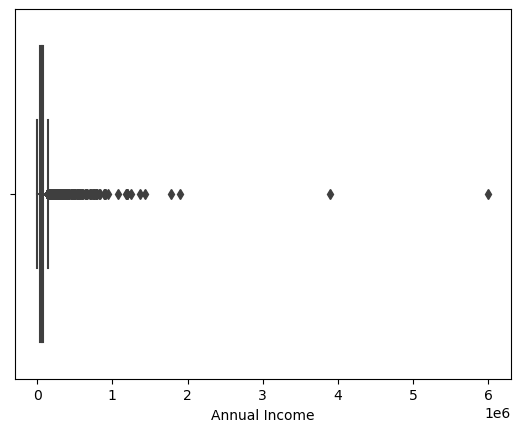

In [22]:
sns.boxplot(x=data['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

Since there are lot of outliers in Annual income, deleting data above 95th percentile

In [23]:
data = data[data['annual_inc'] < data['annual_inc'].quantile(0.95)]

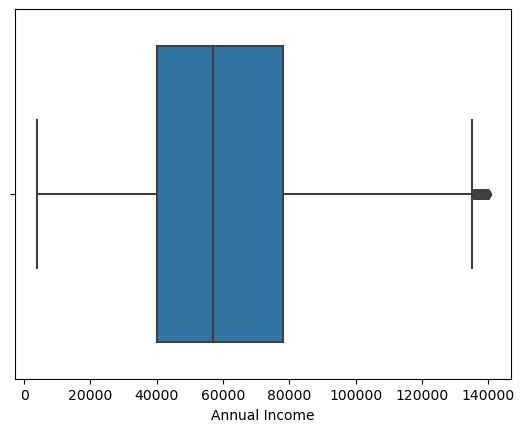

In [24]:
sns.boxplot(x=data['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

# Univariate Analysis

###### Univariate Function

In [25]:
def plot_univariate_analysis(value, x_label, rotation=0, plot=sns.countplot):
    plot(x=value)
    plt.xlabel(x_label)
    plt.xticks(rotation=rotation)
    plt.show()

###### Loan Amount

In [26]:
data.loan_amnt.describe()

count    34482.000000
mean     10931.335914
std       7139.632083
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

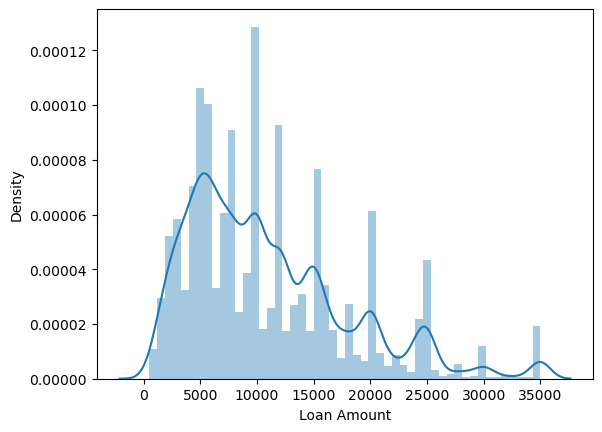

In [27]:
plot_univariate_analysis(value=data.loan_amnt, x_label='Loan Amount', plot=sns.distplot)

**Observation**: Most Loans were USD 5,400 to 15,000

###### Interest Rate

In [28]:
data.int_rate.describe()

count    34482.000000
mean        12.020878
std          3.703817
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

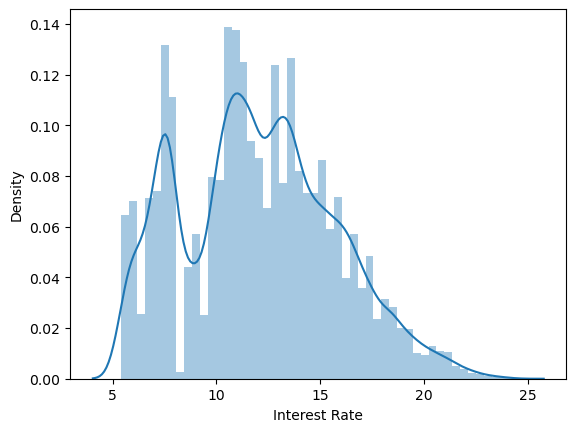

In [29]:
plot_univariate_analysis(value=data.int_rate, x_label='Interest Rate', plot=sns.distplot)

**Observation**: Most interest rate are between 9.25% and 14.6%

###### Installment

In [30]:
data.installment.describe()

count    34482.000000
mean       315.531931
std        198.445570
min         16.080000
25%        165.742500
50%        276.060000
75%        413.875000
max       1305.190000
Name: installment, dtype: float64

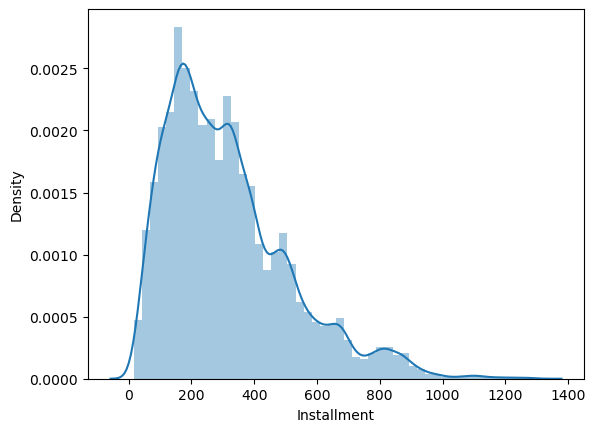

In [31]:
plot_univariate_analysis(value=data.installment, x_label='Installment', plot=sns.distplot)

**Observation**: Most installments are between USD 165 and USD 413

###### Home Ownership

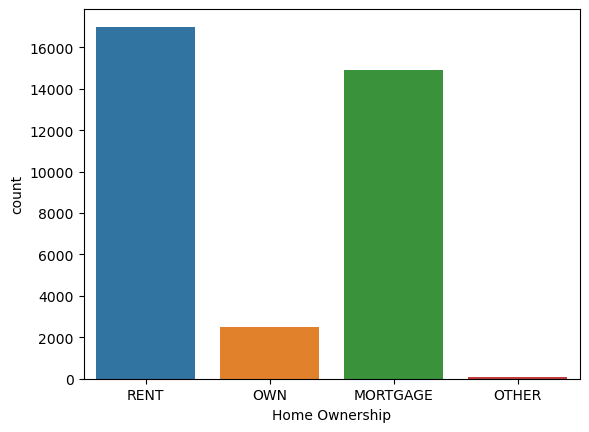

In [32]:
plot_univariate_analysis(value=data.home_ownership, x_label='Home Ownership')

**Observation**: People who live in Rented Homes and Mortgaged homes seem borrow more

##### Purpose

In [33]:
data.purpose.value_counts()

purpose
debt_consolidation    16676
credit_card            4472
other                  3407
home_improvement       2393
major_purchase         1900
car                    1395
small_business         1310
wedding                 849
medical                 594
moving                  500
vacation                325
house                   316
educational             265
renewable_energy         80
Name: count, dtype: int64

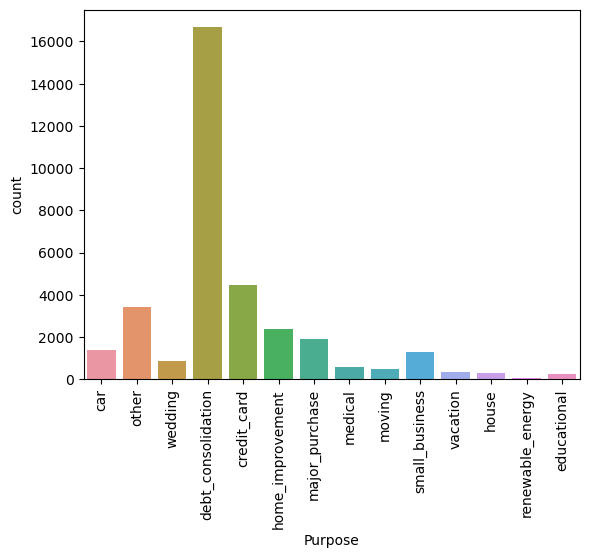

In [34]:
plot_univariate_analysis(value=data.purpose, x_label='Purpose', rotation=90)

**Observation**: Most borrowers seem to have Debt Consolidation as a purpose

###### Delinquency incidents

In [35]:
data.delinq_2yrs.value_counts()

delinq_2yrs
0     30791
1      2851
2       568
3       185
4        51
5        18
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

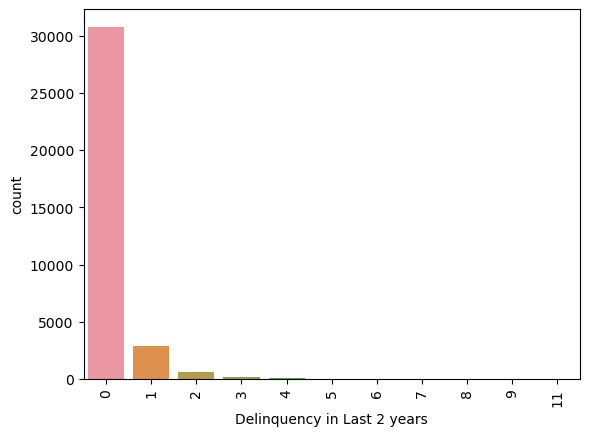

In [36]:
plot_univariate_analysis(value=data.delinq_2yrs, x_label='Delinquency in Last 2 years', rotation=90)

**Observation**: Most borrowers seem to have lesser than 2 delinquency records in the past 2 years with the vast majority of them having none.

###### Public Bankruptcy Records

In [37]:
data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    33020
1.0     1456
2.0        6
Name: count, dtype: int64

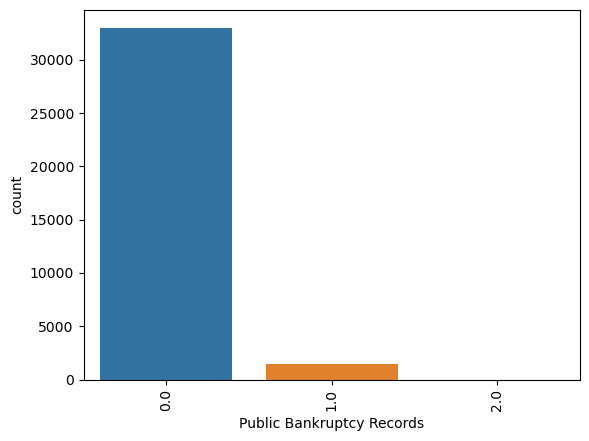

In [38]:
plot_univariate_analysis(value=data.pub_rec_bankruptcies, x_label='Public Bankruptcy Records', rotation=90)

**Observations**: Most borrowers have no public bankruptcy records




# Segmented Univariate Analysis

###### Creating Segmented and derived metrics
1. Annual Income Groups
2. Issued Month
3. Issues Year
4. DTI Range
5. Interest Rate Groups
6. Credit Length in Years and Credit Length Groups
7. Employment length groups

In [39]:
income_groups = ['< $20000', '$20000-$40000', '$40000-$60000', '$60000-$80000', '> $80000']
data['annual_inc_grp'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], labels=income_groups)

data['issue_d_month'] = pd.to_datetime(data.issue_d, format='%b-%y').dt.month
data['issue_d_year'] = pd.to_datetime(data.issue_d, format='%b-%y').dt.year

dti_groups = ['0%-5%', '5%-10%', '10%-15%', '15%-20%', '20%-25%', '>25%']
data['dti_grp'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25, 30], labels=dti_groups)

int_rate_grps = ['5%-10%', '10%-15%', '15%-20%', '20%-25%']
data['int_rate_grp'] = pd.cut(data['int_rate'], [5, 10, 15, 20, 25], labels=int_rate_grps)

data['credit_length_years'] = data['issue_d_year'] - pd.to_datetime(data.earliest_cr_line, format='%b-%y').dt.year
data.loc[data['credit_length_years'] < 0, 'credit_length_years'] = 0
credit_length_years_group = ['0-5y', '5-10y', '10-15y', '15-20y', '20-25y', '25-30y', '30-35y', '35-40y', '>40y']
data['credit_length_years_grp'] = pd.cut(data['credit_length_years'], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45], labels=credit_length_years_group)
data['credit_length_years_grp'].value_counts()

emp_length_grps = ['0-3y', '3-6y', '6-10y', '>10y']
data['emp_length_grp'] = pd.cut(data['emp_length'], [0, 3, 6, 10, 20], labels=emp_length_grps)

###### Creating Data Frame for 'Charged Off', 'Fully Paid' and Current Loan records

In [40]:
data_charged_off = data[data['loan_status'] == 'Charged Off']
data_fully_paid = data[data['loan_status'] == 'Fully Paid']
data_completed_loans = data[data['loan_status'] != 'Current']

###### Defining common function for plotting a given metric data in terms of Charge Off Percentage

In [41]:
def plot_variable_vs_chargeoff(value, value_groups, x_axis_label, y_axis_label, plot):
    variable_chargeoff_perc = np.array([ round(len(data_charged_off[data_charged_off[value] == i]) / len(data[data[value] == i]) * 100, 2) for i in value_groups])
    df = pd.DataFrame({x_axis_label: np.array(value_groups) , y_axis_label: variable_chargeoff_perc } )
    plot(data = df, x = x_axis_label, y = y_axis_label)
    plt.show()
    

def plot_variable_vs_chargeoff_with_boxplot(value_1, value_2, value_groups, x_axis_label_1, y_axis_label_1, x_axis_label_2, y_axis_label_2, plot):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    variable_chargeoff_perc = np.array([ round(len(data_charged_off[data_charged_off[value_1] == i]) / len(data[data[value_1] == i]) * 100, 2) for i in value_groups])
    df = pd.DataFrame({x_axis_label_1: np.array(value_groups) , y_axis_label_1: variable_chargeoff_perc } )
    plot(data = df, x = x_axis_label_1, y = y_axis_label_1, ax=axes[0])

    box_plot = sns.boxplot(x=data_completed_loans['loan_status'], y=data_completed_loans[value_2], ax=axes[1])
    box_plot.set(xlabel=x_axis_label_2, ylabel=y_axis_label_2)
    plt.show()
    

def plot_simple_barplot_vs_loan_status(value, y_label):
    sns.boxplot(x=data_completed_loans['loan_status'], y=data[value])
    plt.xlabel('Loan Status')
    plt.ylabel(y_label)
    plt.show()


###### Income Groups

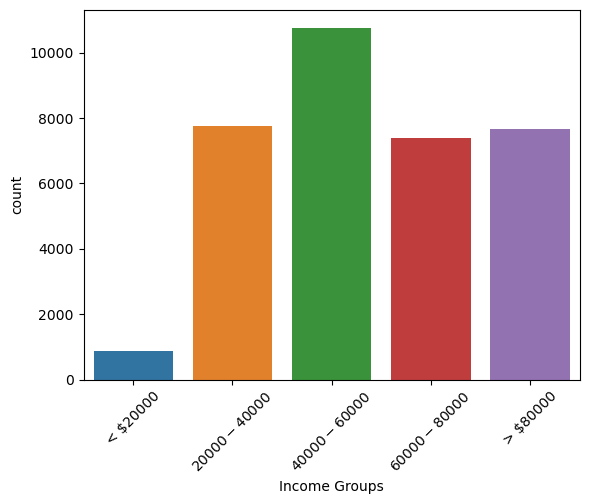

In [42]:
plot_univariate_analysis(value=data.annual_inc_grp, x_label='Income Groups', rotation=45)

**Observation**: Number of borrowers in Income Group USD 40,000-USD 60,000 borrow most whereas < USD 20,000 borrow least.

###### Loan Issued Month

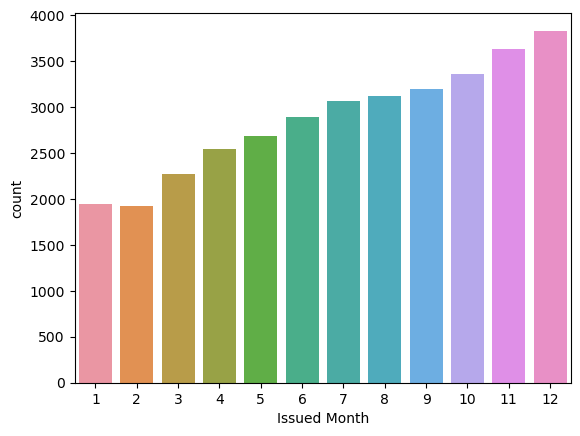

In [43]:
plot_univariate_analysis(value=data.issue_d_month, x_label='Issued Month')

**Observations**: The number of loans issued increases as the year goes on.

###### Loan Issued Year

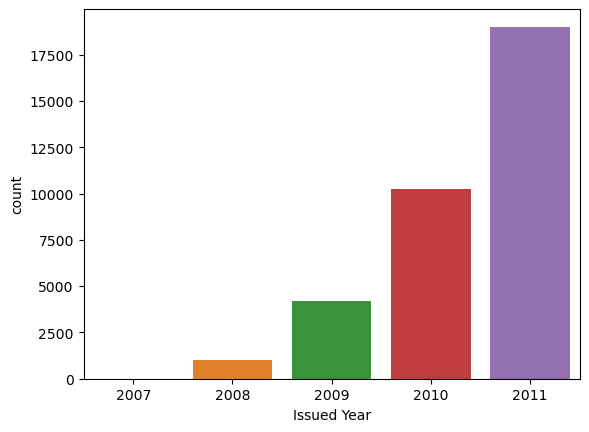

In [44]:
plot_univariate_analysis(value=data.issue_d_year, x_label='Issued Year')

**Observations**: More loans are approved every year.

###### DTI Range

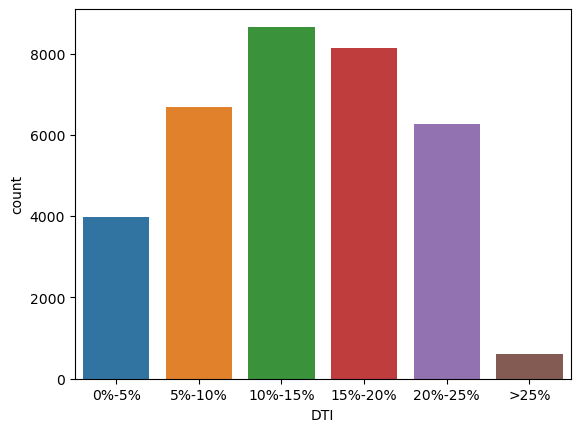

In [45]:
plot_univariate_analysis(value=data.dti_grp, x_label='DTI')

**Observations**: Most borrowers have DTI in the range of 10%-15%.

###### Employment Length Range

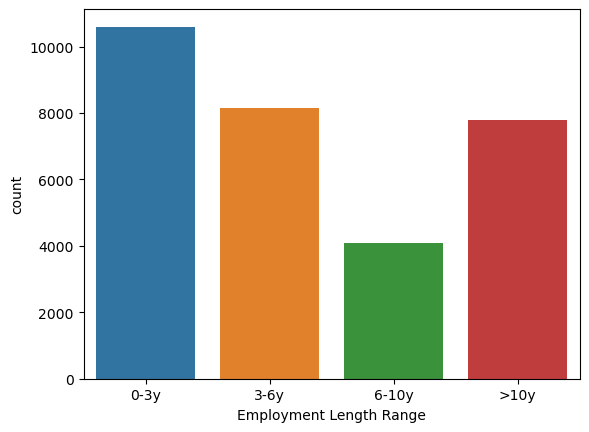

In [46]:
plot_univariate_analysis(value=data.emp_length_grp, x_label='Employment Length Range')

**Observations**: Most borrowers are have an employment range of 0-3 years.

###### Interest Rate Group

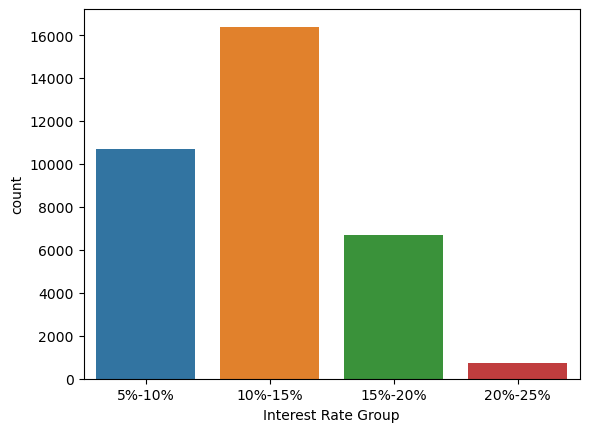

In [47]:
plot_univariate_analysis(value=data.int_rate_grp, x_label='Interest Rate Group')

**Observations**: Most borrowers have an interest range of 10%-15%

###### Credit Length (Years) Group

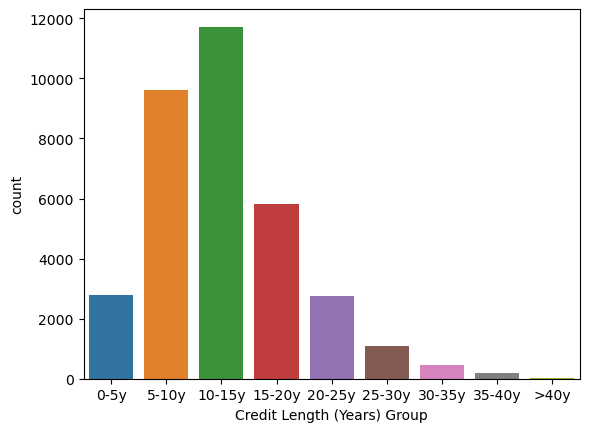

In [48]:
plot_univariate_analysis(value=data.credit_length_years_grp, x_label='Credit Length (Years) Group')

**Observations**: Most borrowers have a Credit Length of 10-15 years

# Bivariate analysis

###### Income Groups

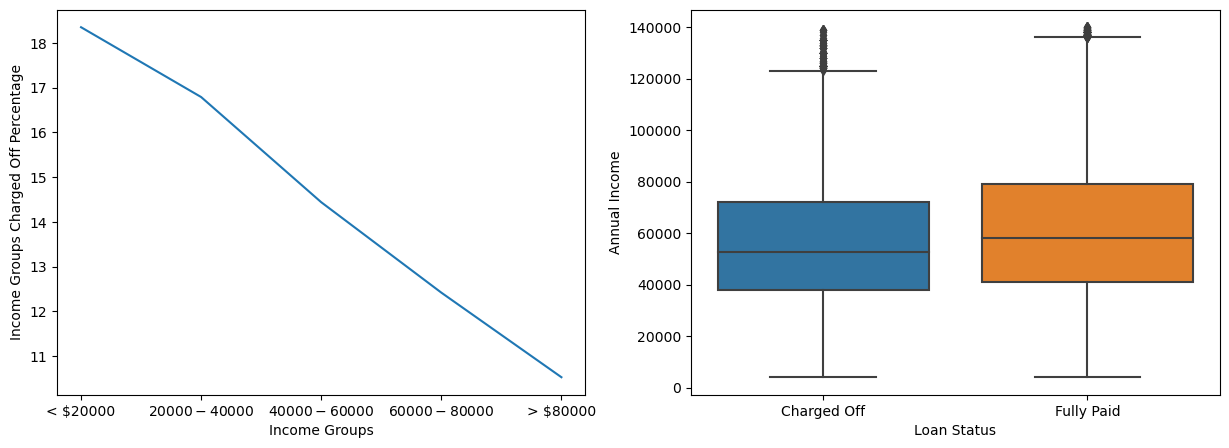

In [49]:
plot_variable_vs_chargeoff_with_boxplot(value_1= 'annual_inc_grp', value_2='annual_inc', value_groups=income_groups, 
                            x_axis_label_1='Income Groups', y_axis_label_1='Income Groups Charged Off Percentage', 
                            x_axis_label_2='Loan Status', y_axis_label_2='Annual Income', 
                            plot=sns.lineplot)

**Observations**: 
1. As income increases, percentage of Charge Off decreases.
2. In comparison, Annual Income of Charged Off applicants is lower.

###### Interest Rate / Interest Rate Group

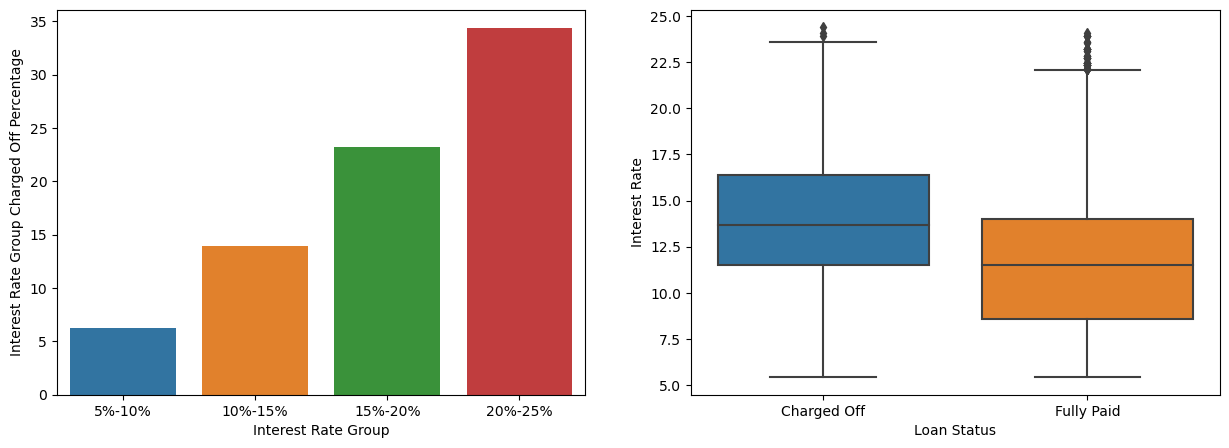

In [50]:
plot_variable_vs_chargeoff_with_boxplot(value_1= 'int_rate_grp', value_2='int_rate', value_groups=int_rate_grps, 
                            x_axis_label_1='Interest Rate Group', y_axis_label_1='Interest Rate Group Charged Off Percentage', 
                            x_axis_label_2='Loan Status', y_axis_label_2='Interest Rate', 
                            plot=sns.barplot)

**Observations**: The higher the interest rate, the higher the chances of Charge Off.

###### Loan Amount

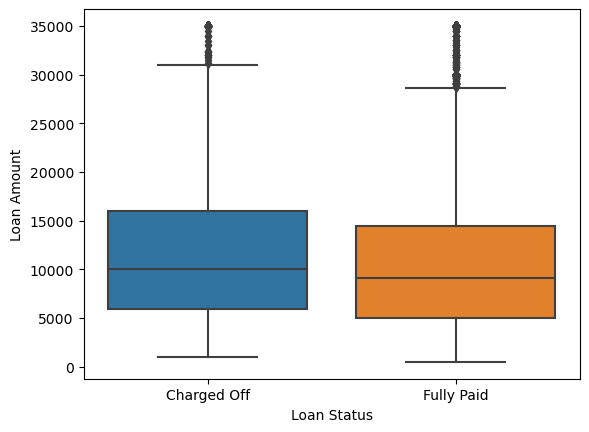

In [51]:
plot_simple_barplot_vs_loan_status(value='loan_amnt', y_label='Loan Amount')

**Observations**: Loan Amount is generally higher for Charged Off loans

###### Loan Grade Charge Off Percentage

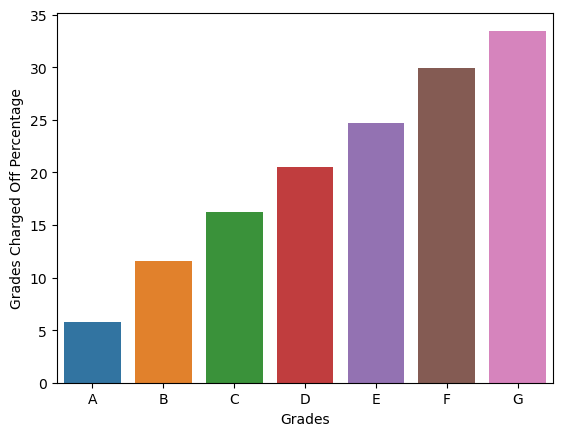

In [52]:
all_grades = data['grade'].unique()
all_grades.sort()

plot_variable_vs_chargeoff(value= 'grade', value_groups=all_grades, x_axis_label='Grades', 
                           y_axis_label='Grades Charged Off Percentage', plot=sns.barplot )

**Observations**: Better the loan grade, lower chances of charge off

###### Loan Term Charge Off Percentage

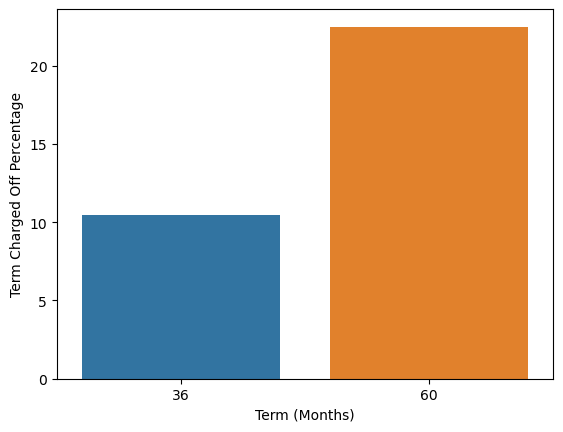

In [53]:
plot_variable_vs_chargeoff(value= 'term', value_groups=data.term.unique(), x_axis_label='Term (Months)', 
                           y_axis_label='Term Charged Off Percentage', plot=sns.barplot)

**Observations**: Higher the Term, higher the chances of Charge Off

###### Purpose Charge Off Percentage

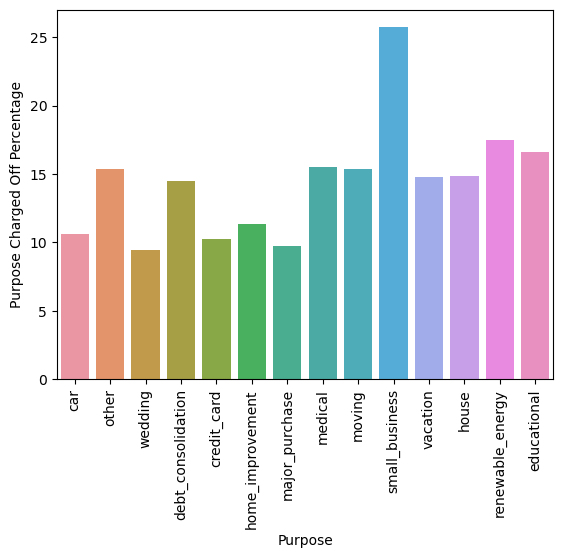

In [54]:
all_purposes = data['purpose'].unique()
plt.xticks(rotation=90)
plot_variable_vs_chargeoff(value= 'purpose', value_groups=data['purpose'].unique(), x_axis_label='Purpose', 
                           y_axis_label='Purpose Charged Off Percentage', plot=sns.barplot )

**Observations**: Loans taken for small business have much higher chances of charge off

###### DTI Range

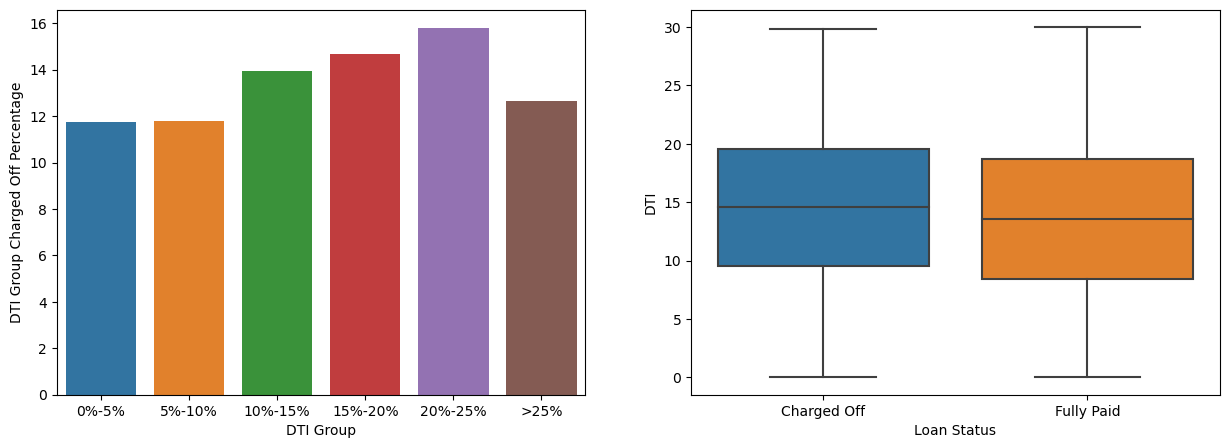

In [55]:
plot_variable_vs_chargeoff_with_boxplot(value_1= 'dti_grp', value_2='dti', value_groups=dti_groups, 
                            x_axis_label_1='DTI Group', y_axis_label_1='DTI Group Charged Off Percentage', 
                            x_axis_label_2='Loan Status', y_axis_label_2='DTI', 
                            plot=sns.barplot)

**Observations**: 
1. In the Line Plot, If DTI > 10%, chances of charge off increase. 
2. In the box plot, we can observe that DTI is higher in general for Charged Off Loans

Note: >25% is only 2% of the records. We might not have enough data to support the observation.

###### Home Ownership Charge Off Percentage

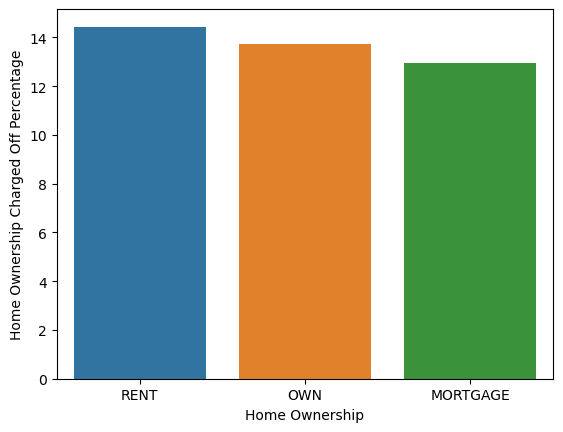

In [56]:
plot_variable_vs_chargeoff(value= 'home_ownership', value_groups=['RENT', 'OWN', 'MORTGAGE'], x_axis_label='Home Ownership', 
                           y_axis_label='Home Ownership Charged Off Percentage', plot=sns.barplot )

**Observations**:
1. There is very little difference between Charge Off rates among Rented, Mortgage and Own residences.
2. However, those who rent seem to Charge Off slightly more

###### Loan Issued Month

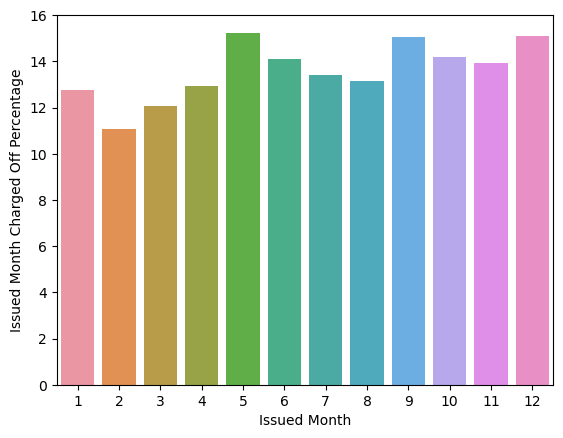

In [57]:
plot_variable_vs_chargeoff(value= 'issue_d_month', value_groups=np.arange(1, 13), x_axis_label='Issued Month', 
                           y_axis_label='Issued Month Charged Off Percentage', plot=sns.barplot )

**Observations**: Loans issued in February have lowest chances of charge off whereas loans approved in May, September and December have highest chances of charge off

###### Loan Issued Year

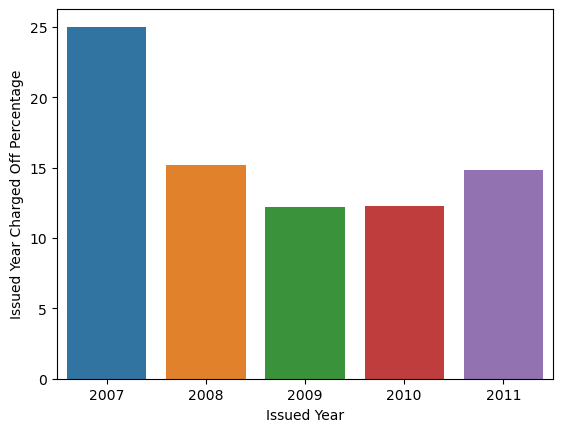

In [58]:
all_years = data['issue_d_year'].unique()
plot_variable_vs_chargeoff(value='issue_d_year', value_groups=all_years, 
                                        x_axis_label='Issued Year', y_axis_label='Issued Year Charged Off Percentage', 
                                        plot=sns.barplot )

**Observations**: Loans issued in 2007 have the highest percentage of Charge Off. But data for 2007 is very less.
Loans issues in 2008 and 2011 have higher Charge Off chances

###### State Charge Off Percentage

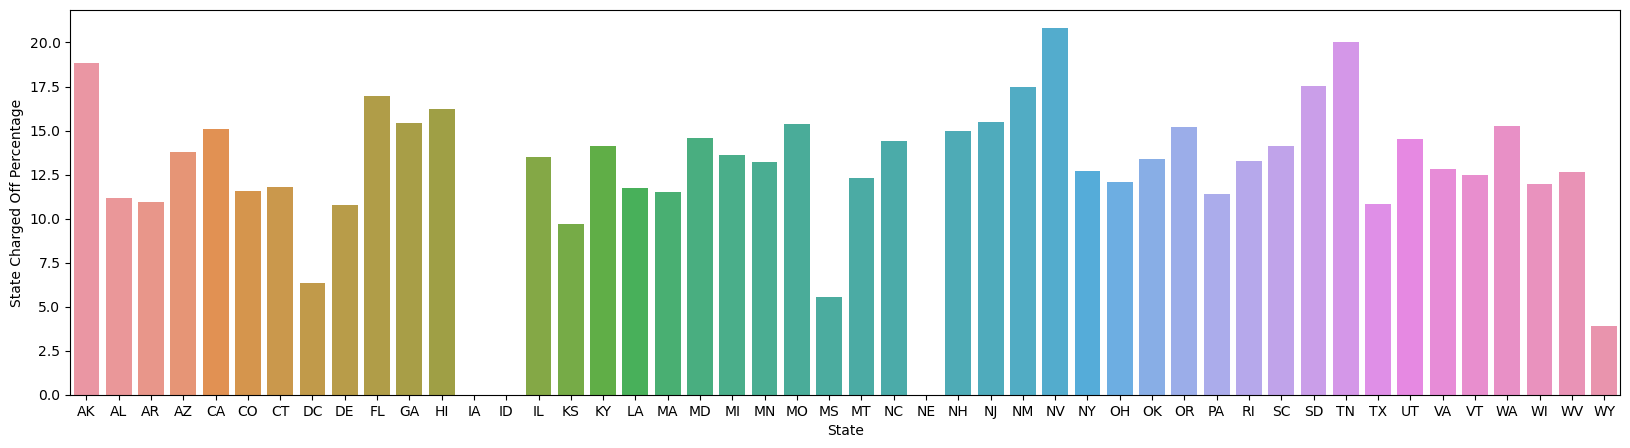

In [59]:
plt.figure(figsize=(20,5))
states=data.addr_state.unique()
states.sort()
plot_variable_vs_chargeoff(value= 'addr_state', value_groups=states, x_axis_label='State', 
                           y_axis_label='State Charged Off Percentage', plot=sns.barplot )

**Observations**: States like Nevada, Tennessee, Arkansas, New Jersey, South Dakota, New Mexico, Florida, Washington have highest percentage of Charge Off. States like Wyoming, Massachusetts, District of Columbia have lowest percentage of Charge Off.

###### Employment Range

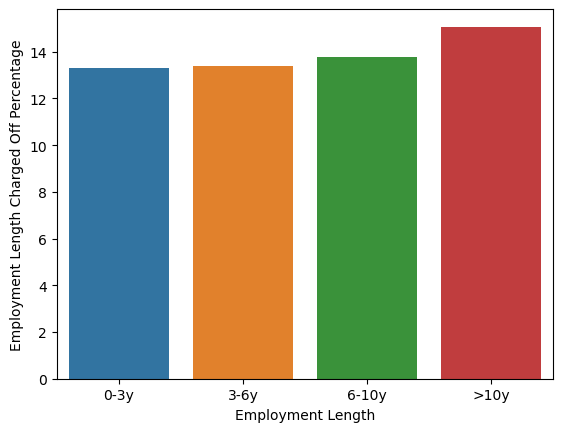

In [60]:
plot_variable_vs_chargeoff(value='emp_length_grp', value_groups=emp_length_grps, 
                           x_axis_label='Employment Length', y_axis_label='Employment Length Charged Off Percentage', 
                           plot=sns.barplot )

**Observations**: Chances of Charge Off increases as Employment Length increases.

###### Number of inquiries in the past 6 months

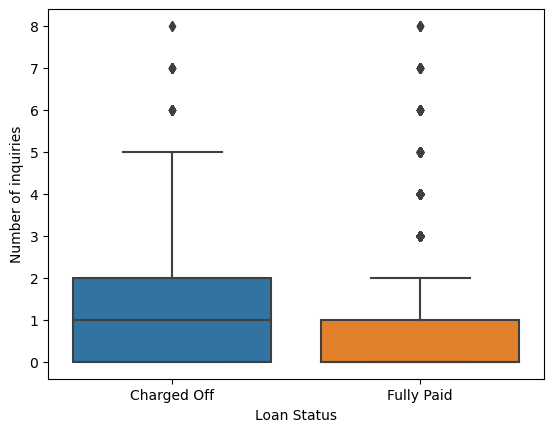

In [61]:
plot_simple_barplot_vs_loan_status(value='inq_last_6mths', y_label='Number of inquiries')

**Observations**: Number of Inquiries in the past 6 months are higher for Charged Off Loans

###### Public Derogatory Records Charge Off Percentage

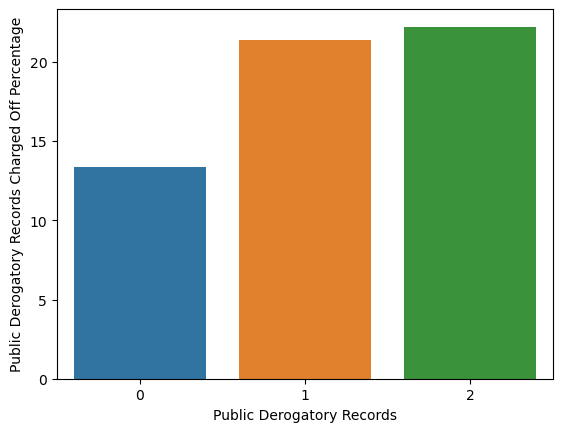

In [62]:
plot_variable_vs_chargeoff(value= 'pub_rec', value_groups=data_charged_off.pub_rec.unique(), x_axis_label='Public Derogatory Records', 
                           y_axis_label='Public Derogatory Records Charged Off Percentage', plot=sns.barplot )

**Observations**: Higher the Public Derogatory Records, higher the chances of Charge Off.

###### Public Bankruptcy Records Charge Off Percentage

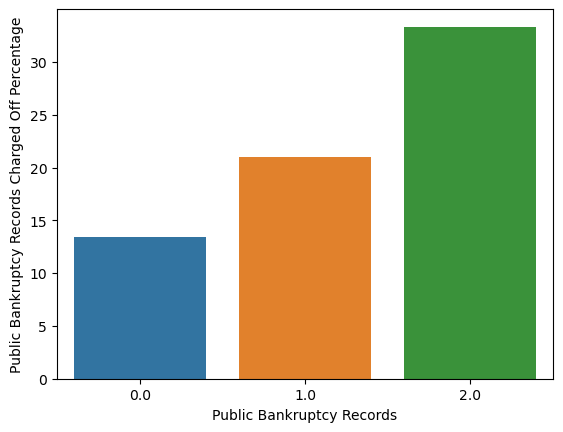

In [63]:
plot_variable_vs_chargeoff(value= 'pub_rec_bankruptcies', value_groups=data.pub_rec_bankruptcies.unique(), x_axis_label='Public Bankruptcy Records', 
                           y_axis_label='Public Bankruptcy Records Charged Off Percentage', plot=sns.barplot )

**Observations**: Higher the Public Bankruptcy Records, higher the chances of Charge Off.

###### Delinquency 2 years Records Charge Off Percentage

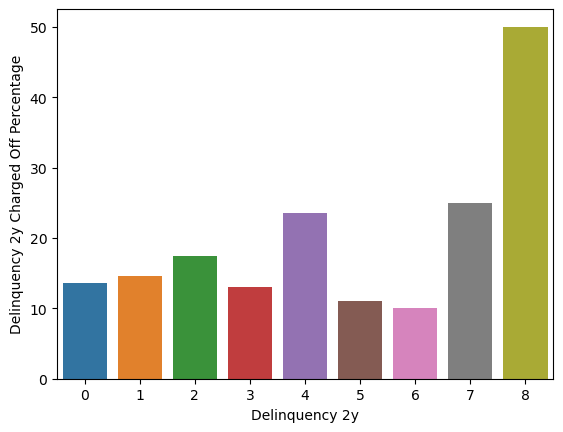

In [64]:
plot_variable_vs_chargeoff(value= 'delinq_2yrs', value_groups=data_charged_off.delinq_2yrs.unique(), x_axis_label='Delinquency 2y', 
                           y_axis_label='Delinquency 2y Charged Off Percentage', plot=sns.barplot )

**Observations**: Although there is no upward line, with the exception of 5 and 6 records, there is a clear increasing trend. So, we can conclude that number of delinquency records, higher the chances of Charge Off.

###### Revolving Line Utilization Rate

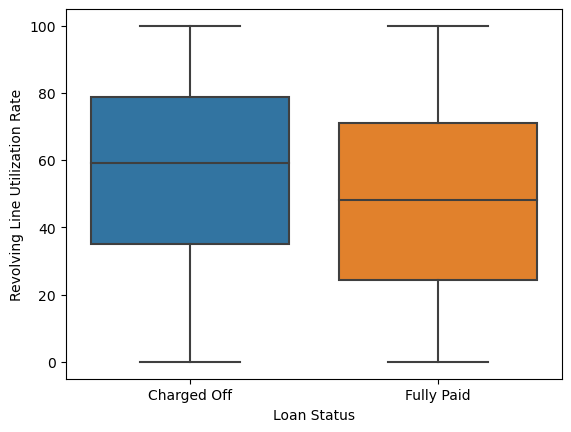

In [65]:
plot_simple_barplot_vs_loan_status(value='revol_util', y_label='Revolving Line Utilization Rate')

**Observations**: Revolving Line Utilization Rate is higher in Charged Off Loans

###### Number of open credit lines

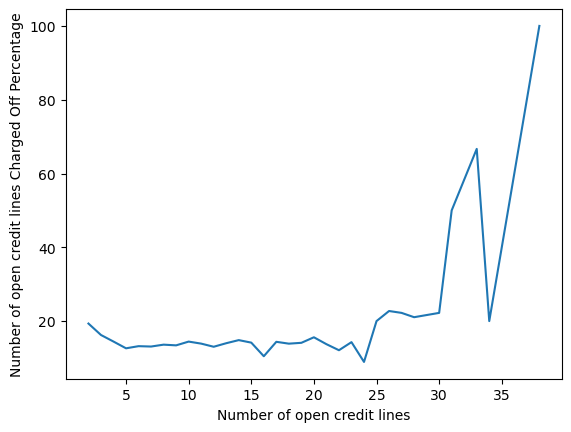

In [66]:
plot_variable_vs_chargeoff(value= 'open_acc', value_groups=data_charged_off.open_acc.unique(), 
                           x_axis_label='Number of open credit lines', 
                           y_axis_label='Number of open credit lines Charged Off Percentage', plot=sns.lineplot )

**Observations**: Higher the Number of open credit lines, higher the chances of Charge Off.

###### Credit Length (in Years)

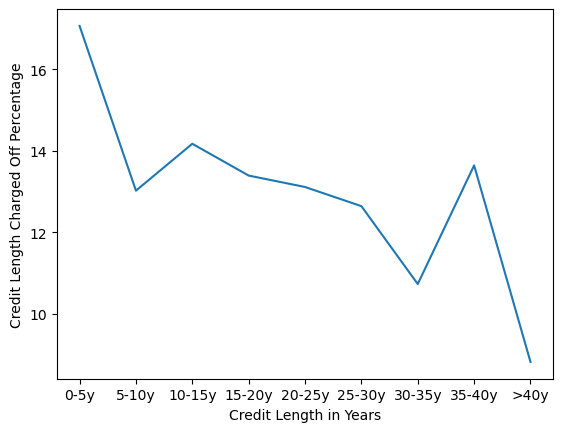

In [67]:
plot_variable_vs_chargeoff(value= 'credit_length_years_grp', value_groups=credit_length_years_group, 
                           x_axis_label='Credit Length in Years', 
                           y_axis_label='Credit Length Charged Off Percentage', plot=sns.lineplot )

**Observations**: There is a strong trend where borrowers who have higher Credit Length have lower chances of Charge Off

##### Co-relation between numerical attributes (Charged Off Data)

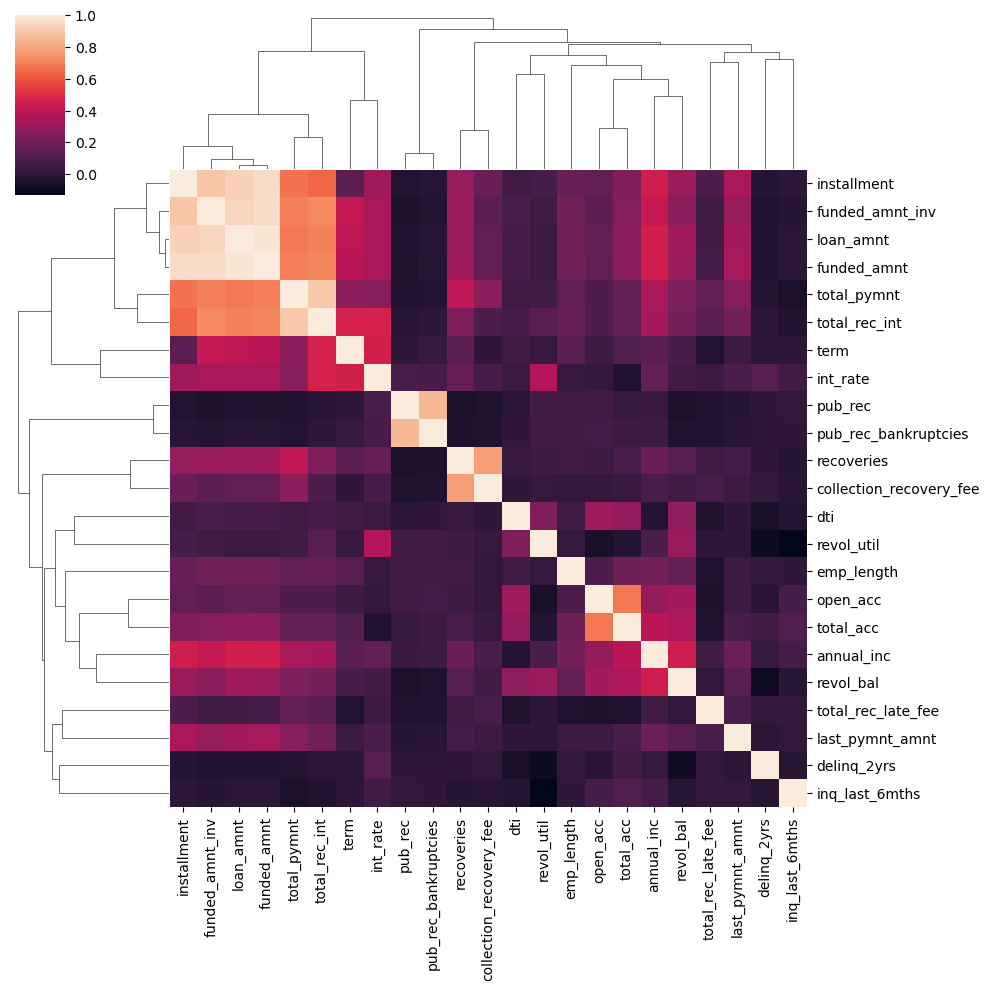

In [68]:
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
                    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                    'total_acc', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                     'last_pymnt_amnt', 'pub_rec_bankruptcies']

sns.clustermap(data_charged_off[numerical_columns].corr())
plt.show()

**Observations**:
1. Installment, Funded Amount By Investors, Loan Amount, Funded Amount, Total Payment, Total Interest Received have a very good co-relation. 
2. Term also follows Installment, Funded Amount By Investors, Loan Amount, Funded Amount,  Total Interest Received.
3. Annual Income follows Installment, Funded Amount By Investors, Loan Amount, Funded Amount.
4. Annual Income and Total Credit Revolving Balance have a good co-relation.
5. Revolving line utilization rate and Interest Rate have a good co-relation.
6. Total Interest received follows Term and Interest Rate


##### Co-relation between numerical attributes (Fully Paid Data)

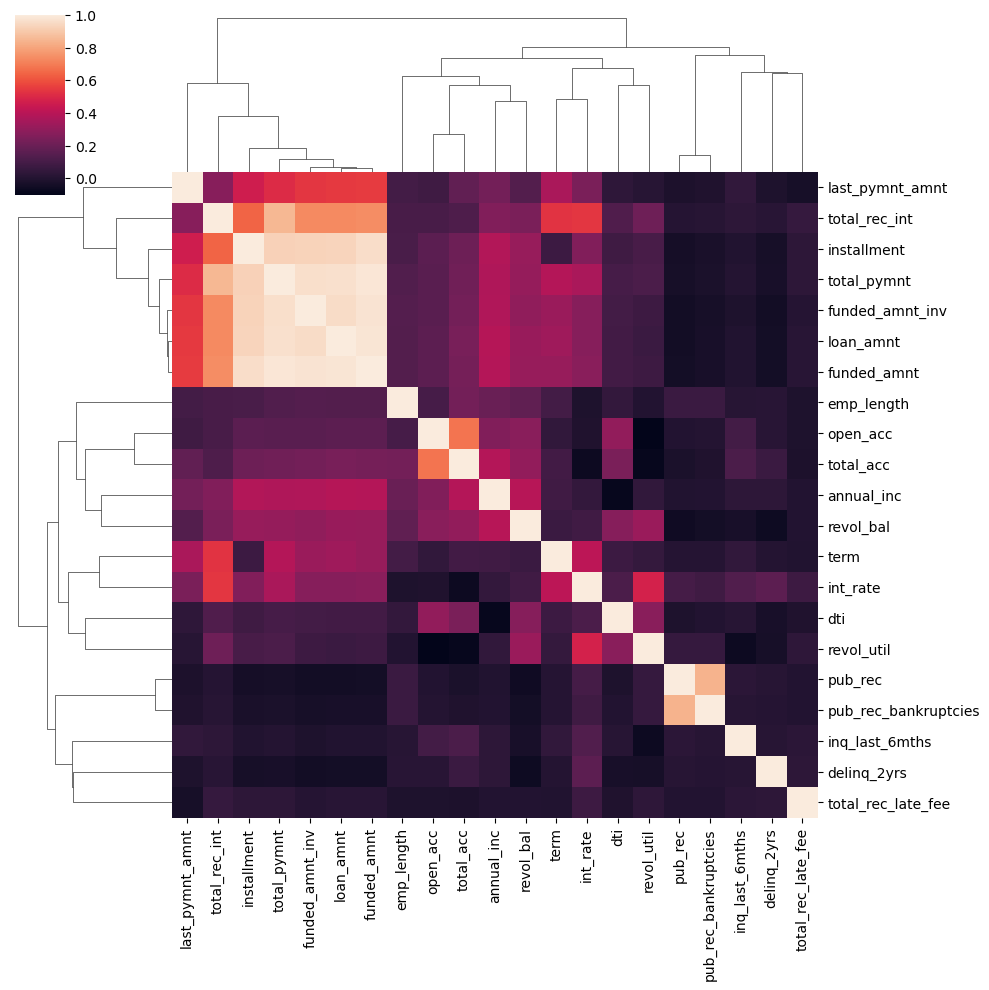

In [69]:
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 
                     'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                     'total_acc', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']

sns.clustermap(data_fully_paid[numerical_columns].corr())
plt.show()

**Observations**:
1. Installment, Total Payment, Funded Amount By Investors, Loan Amount, Funded Amount have an excellent co-relation.
2. Total Received Interest very closely follows Installment, Total Payment, Funded Amount By Investors, Loan Amount, Funded Amount
3. Term also follows Installment, Funded Amount By Investors, Loan Amount, Funded Amount,  Total Interest Received.
4. Annual Income follows Installment, Total Payment, Funded Amount By Investors, Loan Amount, Funded Amount.
5. Annual Income and Total Credit Revolving Balance have a good co-relation.
6. Annual Income and Total Accounts have a good co-relation.